# Mathematical programming with Jupyter Notebooks
# Relaxations

*Copyright 2016, Pedro Belin Castellucci & Franklina Maria Bragion de Toledo, All rights reserved.*

*This Notebook is licenced under GLPv3 (https://opensource.org/licenses/GPL-3.0).*

In this Notebook, we will talk about relaxations for integer problems. Let us start be importing the libraries we will use.

In [17]:
# numpy for scientifical computing:
import numpy as np

# The solver we are using:
import pulp

#matplotbib for drawing
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from IPython.display import display

We will start with the question: *how to know if we have an optimal solution of value $z$ to an integer problem?* One answer to this question is: we need a lower bound $\underline{z} \leq z$ and an upper bound $\bar{z} \geq z$ on the value of the integer problem such that $\underline{z} = \bar{z} = z$.

Let us consider the following problem:

Min $z = c(x)$

s.t. $x \in X \subseteq \mathbb{Z}^n$

In order to obtain such bounds, note that every feasible solution $\bar{x} \in X$ to the problem provides an upper bound for the optimal solution, $\bar{z} = c (\bar{x}) \geq z$. It is important to remark that feasible solutions for a __minimisation__ problem provide an __upper bound__ on the optimal solution value, while for __maximisation__ problems they provide a __lower bound__. Therefore, to make our discussion independent from the problem type, we will define __primal bounds__ and __dual bounds__.

__Primal bounds__: primal bounds are feasible solutions to the problem at hand. For some problems, they are easy to find, however, it might be difficult to find *good* primal bounds. For other problems, the task of finding a feasible solution might be as hard as solving the problem itself.

__Dual bounds__: the most usual approach in finding a dual bound is called __relaxation__ and is the subject of study of this Notebook. The key idea behind finding dual bounds is to replace a *difficult* problem by an *easier* one. Two strategies for relaxing are:

- enlarge the set of feasible solutions;
- replace the objective function by a function which has a value not worse than the original one in all the domain of the objective function.

These strategies motivate the following definition.
A problem: 

Min $z = f(x)$.

s.t. $x \in T \subseteq \mathbb{R}^n$

is a __relaxation__ of:

Min $z = c(x)$

s.t. $x \in X \subseteq \mathbb{R}^n$

If, and only if:

(i) $X \subseteq T$, and

(ii) $f(x) \leq c(x), \quad \forall x \in X.$

The first relaxation we will discuss is called __linear relaxation__.


## Linear programming relaxation

The linear relaxed program of an integer program:

Min $z = c(x)$

s.t. $Ax \leq b$,

$x \in \mathbb{Z}^n$,

is the problem:

Min $z = c(x)$

s.t. $Ax \leq b$,

$x \in \mathbb{R}^n$.

Let us analyse an example. Consider the following integer program (IP):

Min $z^R = -2x_1 -3x_2$

s.t. 

$x_1 + 2x_2 \leq 7$,

$2x_1 + x_2 \leq 7$,

$-x_1 + 4x_2 \leq 10$,

$12x_1 + 5x_2 \leq 39$,

$x_1 \geq 0$ and $x_2 \geq 0$,

$x_1$ and $x_2 \in \mathbb{Z}^n$.

Let us solve the linear relaxation of this problem using PuLP.

In [1]:
import pulp
model = pulp.LpProblem('Linear relaxation example', pulp.LpMinimize)

# Note that we are defining the variables as continuous, not integer!
x1 = pulp.LpVariable('x1', lowBound=0, cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Continuous')

model += -2*x1 - 3*x2  # Objective function

model += x1 + 2*x2 <= 7
model += 2*x1 + x2 <= 7
model += -x1 + 4*x2 <= 10
model += 12*x1 + 5*x2 <= 39

status = model.solve()

for v in model.variables():
    val = v.value()
    print ('%s = %.3f' % (v, val))
        
print ('The value of the solution is %.3f' % model.objective.value())

x1 = 2.263
x2 = 2.368
The value of the solution is -11.632


So, an optimal solution for the __relaxed problem__  is $z^R = -11.632$, with $(x_1, x_2) = (2.263, 2.368)$. Since the problem we solved is a relaxation of (IP), $z^R$ is a dual bound for (IP), $\underline{z} = z_R \leq z $. By inspection, we can also see that $(x_1, x_2) = (1, 1)$ is a feasible solution to (IP), thus $\bar{z} = -5$ is a primal bound for (IP). Therefore, we know that the optimal objective value for (IP) is limited within the interval $[\underline{z}, \bar{z}]$. 

We can define a measure of *how far* a solution is from the optimal if we have a dual bound. This measurement is called (MIP) __GAP__ and can be define as follows:

$$GAP = \frac{|(primal\ bound) - (dual\ bound)|}{|(primal\ bound)|}.$$

For our example, we have $GAP = \frac{|-11.632 + 5|}{5} = 132.64\%$.

Now, we will go one step further. We know $x_1, x_2 \in \mathbb{Z}$ and all the coefficients of the objective function are integers. Therefore, we can tighten the dual bound to $\underline{z} = -11$ and we can check that $(x_1, x_2) = (2, 2)$ corresponds to a feasible solution of value $\bar{z} = 10$. The GAP associated with $(x_1, x_2) = (2, 2)$ is $GAP = \frac{|-11 + 10|}{10} = 10\%$, which is a much better GAP than the previous one. 

It is important to note that the GAP, as we defined it, is a measure of the __worst__ case scenario, namely, the current primal solution may be better than the GAP suggested (or even be optimal), but we cannot prove it yet. We should try to improve the (primal and/or dual) bounds.

# Lagrangian relaxation

While the linear programming relaxation is based on the variables integrality, the Lagrangian relaxation is based on other constraints. Suppose we have the following problem:

Min $z = c(x)$

s.t. $Ax \leq b $ 

$x \in X \subseteq \mathbb{Z}^n$.

But the problem is too difficult to solve. One could drop contraints $Ax \leq b$ and solve the remaining problem to obtain a dual bound. This is particuly useful if, after dropping some constraints, there is a procedure to easily obtain a solution for the remaining problem.

Let us use the following problem as an example:

Min $z = -2x_1 -3x_2$

s.t. 

$x_1 + 2x_2 \leq 7$,

$10x_1 + 6x_2 \leq 35$,

$-x_1 + 4x_2 \leq 10$,

$12x_1 + 5x_2 \leq 39$,

$x_1 \geq 0$ and $x_2 \geq 0$,

$x_1$ and $x_2 \in \mathbb{Z}^n$.

Which has the following feasible region:

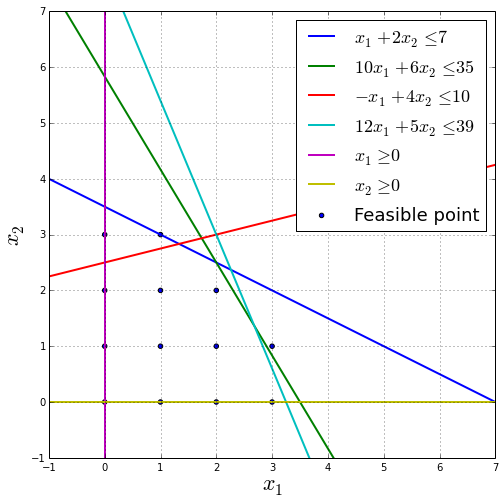

In [19]:
A = np.matrix('1 2; 10 6; -1 4; 12 5')
b = np.matrix('7  ; 35  ; 10  ; 39')
c = np.matrix('-2.0 -3.0')

# create the plot object:
fig, ax = plt.subplots(figsize=(8, 8))
s = np.linspace(-1, 7)

# Adding the constraints:
ax.plot(s, (b[0,0]-A[0,0]*s)/A[0,1], lw=2, label='$x_1 + 2x_2 \leq 7$')
ax.plot(s, (b[1,0] - A[1,0]*s)/A[1,1], lw=2, label='$10x_1 + 6x_2 \leq 35$')
ax.plot(s, (b[2,0] - A[2,0]*s)/A[2,1], lw=2, label='$-x_1 + 4x_2 \leq 10$')
ax.plot(s, (b[3,0] - A[3,0]*s)/A[3,1], lw=2, label='$12x_1 + 5x_2 \leq 39$')


# add non-negativity constraints:
ax.plot(np.zeros_like(s), s, lw=2, label='$x_1 \geq 0$')
ax.plot(s, np.zeros_like(s), lw=2, label='$x_2 \geq 0$')

# labels and stuff
ax.legend(fontsize=18)

plt.xlabel('$x_1$', fontsize=22)
plt.ylabel('$x_2$', fontsize=22)
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.grid()

# In order to plot the feasible point we need upper bound for x1 and x2:
x1Upper, x2Upper = 5, 5

s1 = range(0, x1Upper + 1)
s2 = range(0, x2Upper + 1)

x1ToPlot, x2ToPlot = [], []
for x1 in s1:
    for x2 in s2:
        # Now we check if point (x1, x2) respect constraints Ax <= b:
        if x1 + 2*x2 <= 7.0 and 2*x1 + x2 <= 7.0:
            x1ToPlot.append(x1)
            x2ToPlot.append(x2)

ax.scatter(x1ToPlot, x2ToPlot, label="Feasible point")
ax.legend(scatterpoints=1, fontsize=18)

# display(fig)

We will relax some constraints, so we will solve the problem:

Min $z^R = -2x_1 -3x_2$

s.t. 

$x_1 + 2x_2 \leq 7$,

$10x_1 + 6x_2 \leq 35$,

$x_1 \geq 0$ and $x_2 \geq 0$,

$x_1$ and $x_2 \in \mathbb{Z}^n$.

We will solve it using PuLP:

In [2]:
import pulp
model = pulp.LpProblem('Lagragian relaxation example', pulp.LpMinimize)

x1 = pulp.LpVariable('x1', lowBound=0, cat='Integer')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Integer')

model += -2*x1 - 3*x2  # Objective function

model += x1 + 2*x2 <= 7
model += 10*x1 + 6*x2 <= 35

# These are the relaxed constraints:
# model += -x1 + 4*x2 <= 10
# model += 12*x1 + 5*x2 <= 39

model.solve()

print ('Value of the variables:')
for v in model.variables():
    val = v.value()
    print ('%s = %.3f' % (v, val))
        
print ('The value of the solution is %.3f' % model.objective.value())

Value of the variables:
x1 = 1.000
x2 = 3.000
The value of the solution is -11.000


PuLP has found an optimal solution $z^R = -11$, $(x_1, x_2) = (1, 3)$. Since we solved a relaxation, we have a dual bound $z^R \leq z$. We already know, from the previous example, that $-10$ is a primal bound so we can have a GAP of: 

$$GAP = \frac{|-11 + 10|}{10} = 10\%.$$

Note that $(x_1, x_2) = (1, 3)$, even though it corresponds to integer values for $x_1$ and $x_2$,  is __not__ a feasible solution for the original problem, therefore it is not a primal bound. In the linear relaxation procedure, if the relaxed solution corresponds to integer values for the variables, then we have also found a primal bound and, therefore, an optimal solution.

Now, as an exercise, relax one constraint at a time and check which one will give the best dual bound. Also, draw the feasible region of the problem to help you visualise the consequences of relaxing each constraint.

A more sofisticated idea consists of incorporating the constraints in the objective function -- not dropping them -- with *Langragian multipliers* (also called dual variables). Then, the original problem:

Min $z = c(x)$

s.t. $Ax \leq b$, 

$x \in X \subseteq \mathbb{Z}^n$, 

becomes, 

Min $z(u) = c(x) - u(b - Ax)$

s.t. $x \in X \subseteq \mathbb{Z}^n$,

$u \geq 0$.

Variables $u$ are called Langragian multiplers.

We will see how we can apply this to our example.

Min $z^R = -2x_1 -3x_2 - u_1(-x_1 + 4x_2) - u_2(12x_1 + 5x_2)$

s.t. 

$x_1 + 2x_2 \leq 7$,

$2x_1 + x_2 \leq 7$,

$x_1 \geq 0$ and $x_2 \geq 0$,

$u_1 \geq 0$ and $u_2 \geq 0$,

$x_1$ and $x_2 \in \mathbb{Z}^n$.

Note that this problem problem is not linear, due to the products among variables $u$ and $x$. But, since it is a relaxation, every solution to the problem will give us a dual bound. We will check the dual bound we get for $(u_1, u_2) = (0, 0.1)$.

In [3]:
import pulp
model = pulp.LpProblem('Lagragian relaxation example', pulp.LpMinimize)

# Note that we are defining the variables as continuous, not integer!
x1 = pulp.LpVariable('x1', lowBound=0, cat='Integer')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Integer')

model += -2*x1 -3*x2 - 0*(-x1 + 4*x2) - 0.1*(12*x1 + 5*x2)  # Objective function

model += x1 + 2*x2 <= 7
model += 10*x1 + 6*x2 <= 35

# These are the relaxed constraints:
# model += -x1 + 4*x2 <= 10
# model += 12*x1 + 5*x2 <= 39

model.solve()

print ('The value of the variables:')
for v in model.variables():
    val = v.value()
    print ('%s = %.3f' % (v, val))
        
print ('The value of the solution is %.3f' % model.objective.value())

The value of the variables:
x1 = 1.000
x2 = 3.000
The value of the solution is -13.700


The solution $z^R = -13.7$ is a dual bound to the original problem and the GAP related to our primal bound, $-10$, is $$GAP = \frac{|-13.7 + 10|}{10} = 37\%.$$

Now, as an exercise, you can change the values of variables $u_1$ and $u_2$, trying to get a better dual bound.


# Combinatorial relaxation

If it is interesting to relax a problem such that the relaxed problem is combinatorial we call this procedure a *combinatorial relaxation*. The key idea, as in other relaxations, is that the relaxed problem should be easier to solve and provide a *good* dual bound. 

As an example, we will argue that finding the minimum one-tree is a relaxation of the minimum tour problem. A one-tree is a graph formed by a tree plus one extra edge, which forms a single cycle. If the cycle contains all nodes, we call it a tour. Therefore, the problem of finding the minimum one-tree is a relaxation of the problem of finding the minimum tour.

To build an example, we will use the Networkx library.

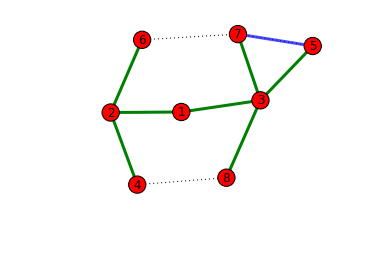

In [22]:
import networkx as nx

graph = nx.Graph()
graph.add_edge(1, 2)
graph.add_edge(1, 3)
graph.add_edge(2, 4)
graph.add_edge(2, 6)
graph.add_edge(3, 5)
graph.add_edge(3, 7)
graph.add_edge(3, 8)
graph.add_edge(5, 7)
graph.add_edge(6, 7)

graph.add_edge(4, 8)

plt.axis('off')
pos = nx.spring_layout(graph)
nx.draw_networkx(graph, pos,  style='dotted')
nx.draw_networkx_edges(graph, pos, edgelist=[
        (1, 2), (1, 3), (2, 4), (2, 6), (3, 5), (3, 7), (3, 8)],
                      width=3, edge_color='g')
nx.draw_networkx_edges(graph, pos, edgelist=[(7, 5)], width=3, alpha=0.7, edge_color='b')

Let us suppose that the graph with the edges in green and blue are the minimum one tree. Note that, because of edge $\{5, 7\}$, the graph with the green edges becomes a one-tree. However, the cycle $(3, 5, 7)$ is not a tour because it does not contain all graph nodes. If the minimum cycle in the minimum one-tree contain all graph nodes, than it is also a tour and, therefore, it is also a solution to the minimum tour problem.